# 房地产公司的数据科学家，主要步骤
1. 观察大局
2. 获得数据
3. 从数据探索和可视化中获得洞见
4. 机器学习算法的数据准备
5. 选择和训练模型
6. 微调模型
7. 展示解决方案
8. 启动、监控和维护系统


# 使用真实数据
- 流行的开放数据存储库
    - UC Irvine Machine Learning Repository (http://archive.ics.uci.edu/ml/datasets.php)
    - Kaggle datasets (https://www.kaggle.com/datasets)
    - Amazon's AWS datasets (https://registry.opendata.aws/)

- 元门户站点（列出开放的数据存储库）
    - http://dataportals.org/
    - https://opendatamonitor.eu/
    - https://www.quandl.com/
    


StatLib 库中选择加州住房价格的数据集

该数据集基于 1990 年加州人口普查的数据

特意添加一个分类属性，并且移除一些特征


# 观察大局
## 框架问题
- 业务目标
- 设定问题
- 选择算法
- 评测模型
- 调整模型
- pipeline
- 是否已有解决方案
- 监督or无监督or强化学习？分类or回归？批量or在线？（MapReduce）

## 选择性能指标
**回归问题**
- RMSE
- MAE

## 检查假设
列举和验证目前为止做出的假设，良好习惯，初期检查


# 获取数据
## 创建工作区
## 下载数据


In [5]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "http://gitee.com/aster/handson-ml"
HOUSING_PATH = "datasets/housing/"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "housing.tgz"

"""
input : 
    parameter1 : the url of dataset
    parameter2 : the dir of data
    
output:
    1 : mkdir the dir for housing_path in current workspace
    2 : download the dataset for housing.tgz to the housing_pah
    3 : tar the file of housing.tgz to the housing_path
"""
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    

In [6]:
import pandas as pd

"""
input :
    parameter : the dir of data for housing
    
output:
    the DataFrame object of pandas
"""
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)


## 快速查看数据结构


In [8]:
# the head method of DataFrame
housing = load_housing_data()
housing.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
# the info method of DataFrame show the dataset description
# especially the total numbet of rows,
# the type of each attribute 
# and the number of non-null values
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
# the attribute of ocean_proximity is object, and others are numeral
# and then the ocean_proximity is too much repeated, so it may be classification
# using the value_counts method could look the number of classification and the each classification frequency
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [11]:
# the describe method could show the description of the type of numeral attribute
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000009161FC8>,
      dtype=object)

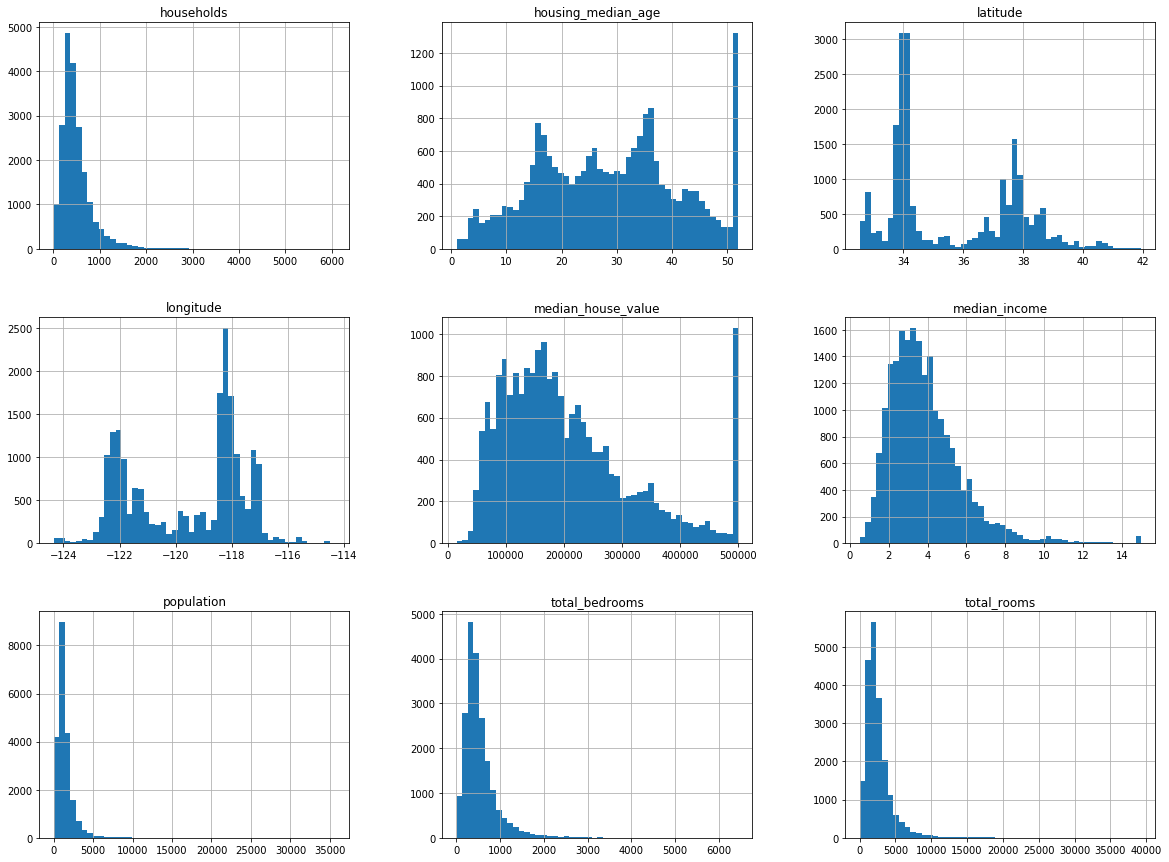

In [12]:
# the other method know numeral attribute is ploting the hist
# can plot each attribute or can plot all attributes of datasest in one picture
import matplotlib.pyplot as plt
%matplotlib inline

housing.hist(bins=50, figsize=(20,15))


## 创建测试集
经常被忽略但却是至关重要的

### 纯随机的抽样方法

In [15]:
# may be it is easy, just random select 20% (0.2) from the dataset 
import numpy as np

"""
input : 
    parameter1 : the data need to split
    parameter2 : the testset proportion ( 0-1), such as 0.2
    
output :
    the tuple of train_set and test_set
    such as : train_set, test_set = split_train_test()
"""
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

# the function just has a little question: 
# each running just random, and then the all dataset will be insight to the algorithm
# solution 1 : set the random seed
#     such as : np.random.seed(42)
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

# the solution 1 equivalent to the sklearn
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

# solution 2 : first running and then save test_set

# solution 1 and solution 2 will interrupt when the update the dataset
# solution 3 : each instance using the unique identifier, 
#    and according to the identifier, select the instance into test_set
# such as using the hash (the identifier of hash)
import hashlib

def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_ : test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]


# unfortunately，housing dataset has not the identifier sequence.
# simple solution using the row index as the ID, and there is no delete any row from the dataset
housing_with_id = housing.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

# or solution using the stable attribute as the unique identifier
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_sest, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")


### 分层抽样方法
保证每一个层次的实例数量比例保持一致

即就是测试集中每一层次实例数量比例 与 数据集中（训练集）中实例数量比例基本保持一致

不应该将层数分的太多，保证每一层应该有足够大

In [17]:
# using the median_income / 1.5 and limit the number of clssification
# and then using ceil function to get discrete categories
# and then the all siscrete categories which upper 5 change the 5 categoty  
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

# accroding to the income_cat , stratified sampling (分层抽样)
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

# according to income_cat , show the proportional distribution 
housing["income_cat"].value_counts() / len(housing)


3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [18]:
# and then delete the new attribute income_cat，recovery the dataset
for set in (strat_train_set, strat_test_set):
    set.drop(["income_cat"], axis=1, inplace=True)

# 从数据探索和可视化中获得洞见
如果训练集数据量特别大，就可以抽样一个探索数据集，操作更加简便快捷一些（探索的速度和效率）

如果数据集数据量小，可以直接在整个训练集上操作

In [19]:
# create the copy for the train_set, and then no hurt to the train_set
housing = strat_train_set.copy()

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


## 将地理数据可视化
地理位置信息（经度和纬度），区域分布图以便于可视化


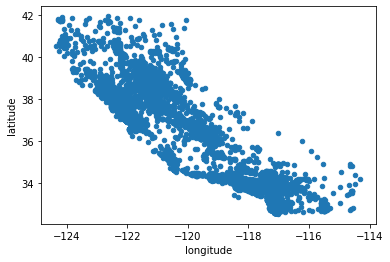

In [20]:
housing.plot(kind="scatter", x="longitude", y="latitude")

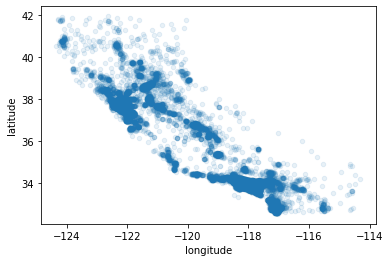

In [22]:
# set the alpha=0.1 in order to location of high-density data points
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

## 房价

每个圆的半径大小代表了每个地区的人口数量（s）

颜色代表价格（c）

使用一个名为 jet 的预定义颜色表（cmap）进行可视化，颜色范围从蓝色（低价）到红色（高价）


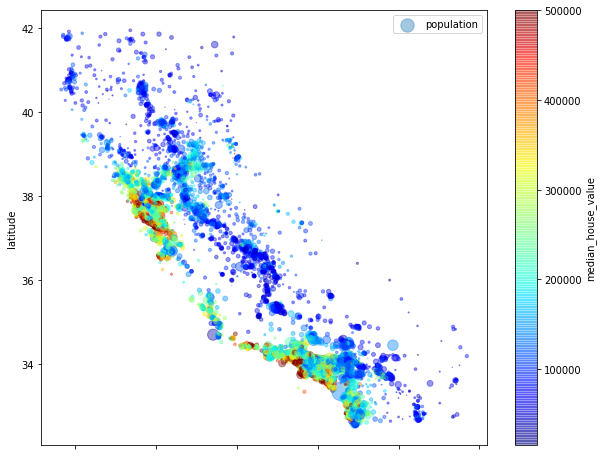

In [30]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, figsize=(10,8),
             s=housing["population"]/100, label="population",
             c="median_house_value",
             cmap=plt.get_cmap("jet"),
             colorbar=True)

plt.legend()

如上图可视化可知
- 房屋价格与地理位置（靠海）和人口密度息息相关
- 一个很有用的方法，使用聚类算法来检测主群体，然后再为各个聚类中心添加一个新的衡量邻近距离的特征
